In [1]:
import pandas as pd 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel(r'C:\Users\OMIII\Downloads\archive (12)\Coffee Shop Sales.xlsx')

In [3]:
df.head()



,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [4]:

df.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [5]:
df.describe()

,transaction_id,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,1.438276,5.342063,47.918607,3.382219
std,43153.600016,0.542509,2.074241,17.930020,2.658723
min,1.000000,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2.000000,8.000000,60.000000,3.750000
max,149456.000000,8.000000,8.000000,87.000000,45.000000


In [6]:
df.duplicated().sum()

0

In [7]:
df.drop(columns = ['product_detail','store_id','transaction_id'],inplace=True)

In [8]:
df.drop_duplicates(inplace=True)
df.head()

,transaction_date,transaction_time,transaction_qty,store_location,product_id,unit_price,product_category,product_type
0,2023-01-01,07:06:11,2,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee
1,2023-01-01,07:08:56,2,Lower Manhattan,57,3.1,Tea,Brewed Chai tea
2,2023-01-01,07:14:04,2,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate
3,2023-01-01,07:20:24,1,Lower Manhattan,22,2.0,Coffee,Drip coffee
4,2023-01-01,07:22:41,2,Lower Manhattan,57,3.1,Tea,Brewed Chai tea


In [9]:
df['store_location'].nunique()

3

In [10]:
# Best Location
best_l=df.groupby('store_location')['transaction_qty'].count().reset_index()
best_l.head()

,store_location,transaction_qty
0,Astoria,50452
1,Hell's Kitchen,50596
2,Lower Manhattan,47670


[1, 1, 1]


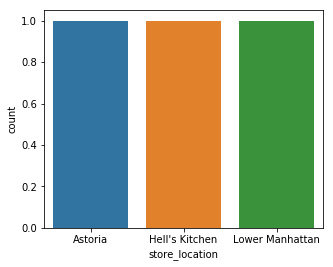

In [11]:
plt.figure(figsize=(5,4))
# sns.countplot(x='store_location', data=best_l)

# Create the countplot
sns.countplot(x='store_location', data=best_l)

# Extract the count data from the plot
ax = plt.gca()
counts = [p.get_height() for p in ax.patches]

# Print the counts
print(counts)

In [12]:
df['product_id'].nunique()

80

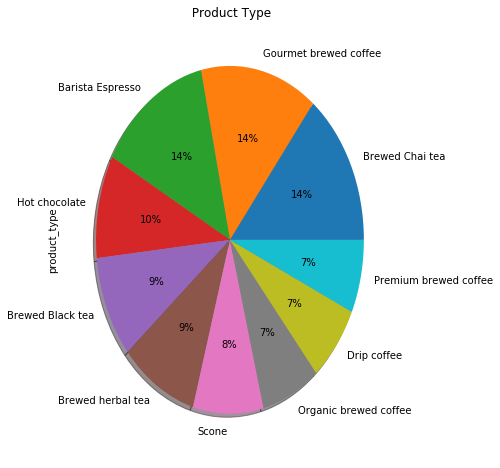

In [13]:
# product_type
p_type=df['product_type'].value_counts().sort_values(ascending =False)
p_type=p_type.head(10)
plt.figure(figsize=(6,8))
p_type.plot(kind='pie',autopct='%.0f%%',shadow=True,title=" Product Type")

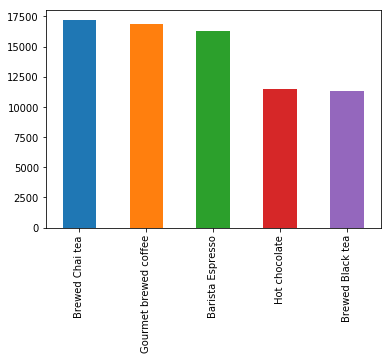

In [14]:
#most selling product:(top 5):
sell=df['product_type'].value_counts().sort_values(ascending=False)
sell.head().plot(kind = 'bar')


In [15]:
df["year"] = df["transaction_date"].dt.year

# add new column month
df["month"] = df["transaction_date"].dt.month_name()

# add new column day
df["day"] = df["transaction_date"].dt.day_name()

In [16]:
df.head()

,transaction_date,transaction_time,transaction_qty,store_location,product_id,unit_price,product_category,product_type,year,month,day
0,2023-01-01,07:06:11,2,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,2023,January,Sunday
1,2023-01-01,07:08:56,2,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,2023,January,Sunday
2,2023-01-01,07:14:04,2,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,2023,January,Sunday
3,2023-01-01,07:20:24,1,Lower Manhattan,22,2.0,Coffee,Drip coffee,2023,January,Sunday
4,2023-01-01,07:22:41,2,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,2023,January,Sunday


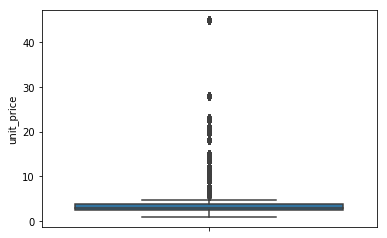

In [17]:
# see 5 number summary to check outliers:

sns.boxplot(y = "unit_price", data = df)

In [18]:

df["Total revenue"] = df["transaction_qty"] * df["unit_price"]

In [19]:
df.head()

,transaction_date,transaction_time,transaction_qty,store_location,product_id,unit_price,product_category,product_type,year,month,day,Total revenue
0,2023-01-01,07:06:11,2,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,2023,January,Sunday,6.0
1,2023-01-01,07:08:56,2,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,2023,January,Sunday,6.2
2,2023-01-01,07:14:04,2,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,2023,January,Sunday,9.0
3,2023-01-01,07:20:24,1,Lower Manhattan,22,2.0,Coffee,Drip coffee,2023,January,Sunday,2.0
4,2023-01-01,07:22:41,2,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,2023,January,Sunday,6.2


In [20]:
#checking transactions unique value:
t_qty=df['transaction_qty'].unique()
t_qty

array([2, 1, 3, 4, 8, 6], dtype=int64)

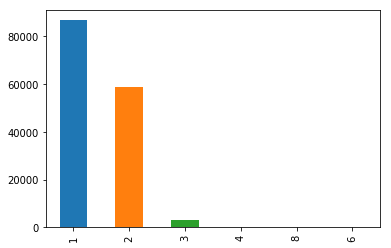

In [21]:
t_qt=df['transaction_qty'].value_counts().sort_values(ascending =False)
t_qt.plot(kind='bar')

In [22]:

# Sales exclusively from 2023.


In [23]:
# see unique values of month column

df["month"].unique()

array(['January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [24]:
month_t=df.groupby('month')['transaction_qty'].count().reset_index()
month_t.head()

,month,transaction_qty
0,April,25275
1,February,16308
2,January,17273
3,June,35251
4,March,21179


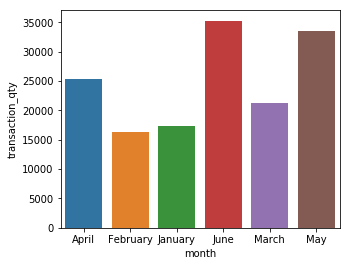

In [25]:
plt.figure(figsize=(5,4))
sns.barplot(x='month',y='transaction_qty', data=month_t)

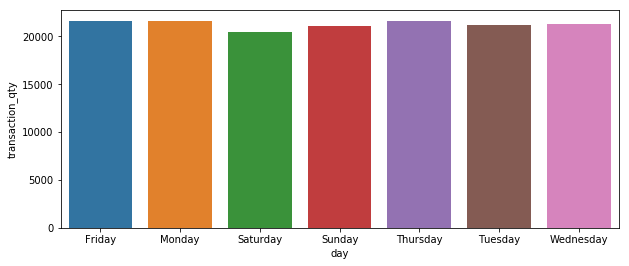

In [26]:
day_t=df.groupby('day')['transaction_qty'].count().reset_index()
day_t.head()

plt.figure(figsize=(10,4))
sns.barplot(x='day',y='transaction_qty', data=day_t)

In [27]:
df

,transaction_date,transaction_time,transaction_qty,store_location,product_id,unit_price,product_category,product_type,year,month,day,Total revenue
0,2023-01-01,07:06:11,2,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,2023,January,Sunday,6.00
1,2023-01-01,07:08:56,2,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,2023,January,Sunday,6.20
2,2023-01-01,07:14:04,2,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,2023,January,Sunday,9.00
3,2023-01-01,07:20:24,1,Lower Manhattan,22,2.00,Coffee,Drip coffee,2023,January,Sunday,2.00
4,2023-01-01,07:22:41,2,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,2023,January,Sunday,6.20
5,2023-01-01,07:22:41,1,Lower Manhattan,77,3.00,Bakery,Scone,2023,January,Sunday,3.00
6,2023-01-01,07:25:49,1,Lower Manhattan,22,2.00,Coffee,Drip coffee,2023,January,Sunday,2.00
7,2023-01-01,07:33:34,2,Lower Manhattan,28,2.00,Coffee,Gourmet brewed coffee,2023,January,Sunday,4.00
8,2023-01-01,07:39:13,1,Lower Manhattan,39,4.25,Coffee,Barista Espresso,2023,January,Sunday,4.25
9,2023-01-01,07:39:34,2,Lower Manhattan,58,3.50,Drinking Chocolate,Hot chocolate,2023,January,Sunday,7.00


In [28]:
time=df.groupby('transaction_time')['product_category'].count()

In [29]:

# Function to classify times into Morning, Evening, or Night
def classify_time(time):
    if 6 <= time.hour < 12:
        return 'Morning'
    elif 12 <= time.hour < 18:
        return 'Afternoon'
    elif 18 <= time.hour < 24:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to create a new column
df['time_of_day'] = df['transaction_time'].map(classify_time)

# Display the updated DataFrame
print(df)


       transaction_date transaction_time  transaction_qty   store_location  \
0            2023-01-01         07:06:11                2  Lower Manhattan   
1            2023-01-01         07:08:56                2  Lower Manhattan   
2            2023-01-01         07:14:04                2  Lower Manhattan   
3            2023-01-01         07:20:24                1  Lower Manhattan   
4            2023-01-01         07:22:41                2  Lower Manhattan   
5            2023-01-01         07:22:41                1  Lower Manhattan   
6            2023-01-01         07:25:49                1  Lower Manhattan   
7            2023-01-01         07:33:34                2  Lower Manhattan   
8            2023-01-01         07:39:13                1  Lower Manhattan   
9            2023-01-01         07:39:34                2  Lower Manhattan   
10           2023-01-01         07:43:05                1  Lower Manhattan   
11           2023-01-01         07:44:35                2  Lower

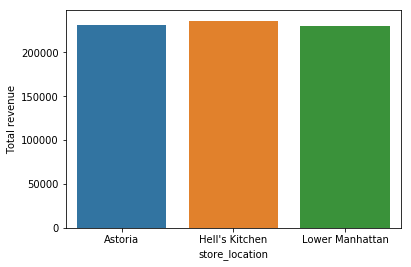

In [30]:
# Stores Vs Total revenue

# Calculate total revenue for each store_location
revenue = df.groupby("store_location")["Total revenue"].sum().reset_index()

# create bar plot
ax = sns.barplot(x = "store_location", y = "Total revenue", data = revenue)

# for p in ax.patches:
#     ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
#                 xytext = (0, 5), textcoords = 'offset points')
    
# plt.show()


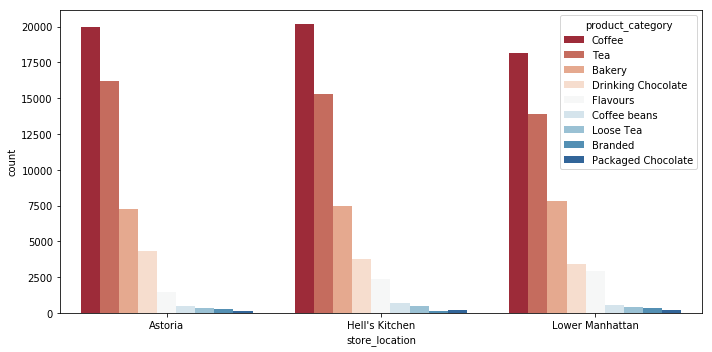

In [31]:
# Stores VS product categories

# Calculate number of product categories at each store location
popular_products = df.groupby('store_location')['product_category'].value_counts().reset_index(name='count')

# set figure size
plt.figure(figsize=(10, 5))

# Create a bar plot 
sns.barplot(x = 'store_location', y = 'count', hue = 'product_category', data = popular_products, palette = "RdBu")

plt.tight_layout()
plt.show()

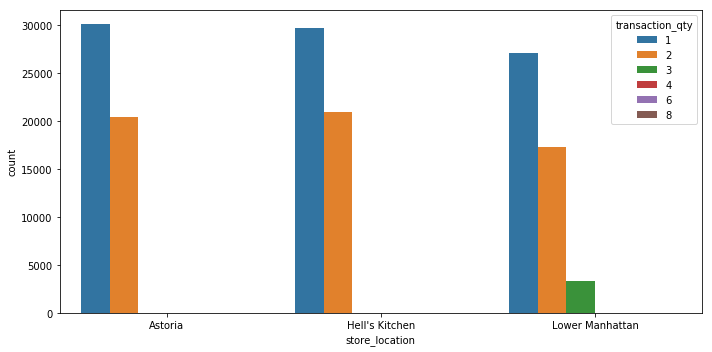

In [32]:
# Stores VS Most transaction_qty

# grouped 'store_location' and 'transaction_qty' as columns
grouped_data = df.groupby("store_location")["transaction_qty"].value_counts().reset_index(name = "count")

# set figure size
plt.figure(figsize=(10, 5))

# Create bar plot
sns.barplot(x = "store_location", y = "count", hue = "transaction_qty", data = grouped_data)

plt.tight_layout()
plt.show()

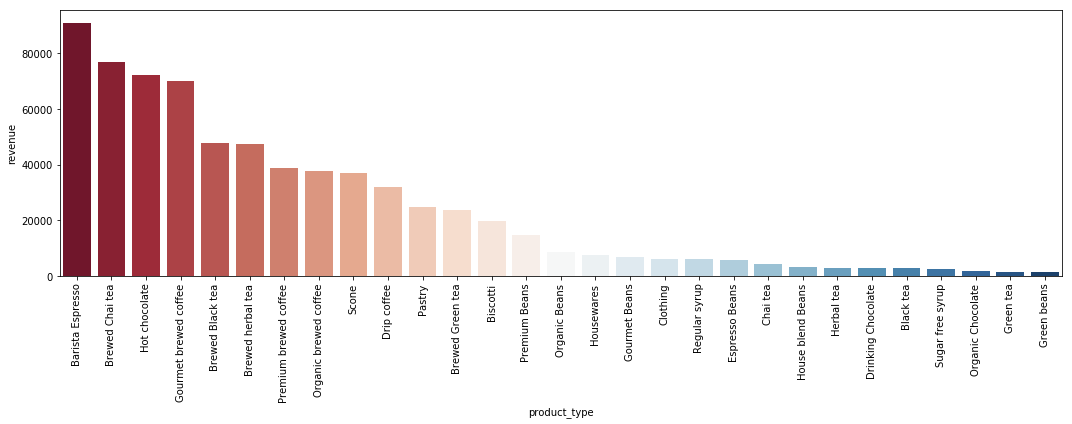

In [33]:

# Category VS Total revenue

# grouped product_type' and 'Total revenue'
category_revenue = df.groupby("product_type")["Total revenue"].sum().reset_index(name = "revenue")

# sort category by revenue
category_revenue = category_revenue.sort_values(by = 'revenue', ascending = False)

# set figure size
plt.figure(figsize = (15,6))

# create bar plot
sns.barplot(x = "product_type", y = "revenue", data = category_revenue, palette = "RdBu")

# set x-axis rotation
plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

In [34]:
#us eplotly


In [35]:


# Assuming your DataFrame is named 'df' for using this in power bi
df.to_csv('cleaned.csv', index=False)


In [36]:
df

,transaction_date,transaction_time,transaction_qty,store_location,product_id,unit_price,product_category,product_type,year,month,day,Total revenue,time_of_day
0,2023-01-01,07:06:11,2,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,2023,January,Sunday,6.00,Morning
1,2023-01-01,07:08:56,2,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,2023,January,Sunday,6.20,Morning
2,2023-01-01,07:14:04,2,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,2023,January,Sunday,9.00,Morning
3,2023-01-01,07:20:24,1,Lower Manhattan,22,2.00,Coffee,Drip coffee,2023,January,Sunday,2.00,Morning
4,2023-01-01,07:22:41,2,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,2023,January,Sunday,6.20,Morning
5,2023-01-01,07:22:41,1,Lower Manhattan,77,3.00,Bakery,Scone,2023,January,Sunday,3.00,Morning
6,2023-01-01,07:25:49,1,Lower Manhattan,22,2.00,Coffee,Drip coffee,2023,January,Sunday,2.00,Morning
7,2023-01-01,07:33:34,2,Lower Manhattan,28,2.00,Coffee,Gourmet brewed coffee,2023,January,Sunday,4.00,Morning
8,2023-01-01,07:39:13,1,Lower Manhattan,39,4.25,Coffee,Barista Espresso,2023,January,Sunday,4.25,Morning
9,2023-01-01,07:39:34,2,Lower Manhattan,58,3.50,Drinking Chocolate,Hot chocolate,2023,January,Sunday,7.00,Morning
